In [1]:
base = '/u/ebanner/Classes/nlp/Project/irony-classifier'

In [ ]:
base = '/u/npockrus/NLP/finalProject/venv/src/irony-classifier'

# Load Conservative Sentences

In [2]:
cd /{base}/data/conservative/features/text+sentiment+subreddit+label+progressiviness/

/v/filer4b/v20q001/ebanner/Classes/nlp/Project/irony-classifier/data/conservative/features/text+sentiment+subreddit+label+progressiviness


In [3]:
import pickle
import scipy
import numpy as np

with open('features.p', 'r') as f:
    data = pickle.load(f)

progressivinesses = [ data[sentence]['progressiviness'] for sentence in sorted(data) ]
ys = np.array([ data[sentence]['label'] for sentence in sorted(data) ])

# Separate Positive and Negative Examples

In [4]:
plus_progressivinesses = [ progressiviness for progressiviness, y in zip(progressivinesses, ys) if y == 1 ]

minus_progressivinesses = [ progressiviness for progressiviness, y in zip(progressivinesses, ys) if y == -1 ]

# Progressiviness in Ironic Comments

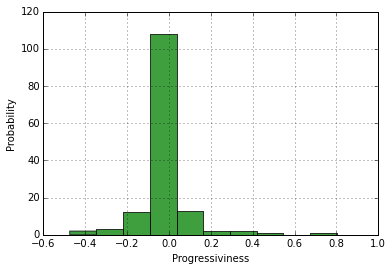

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(plus_progressivinesses, 10, color='green', alpha=0.75)

plt.xlabel('Progressiviness')
plt.ylabel('Probability')
plt.grid(True)

plt.show()

# Progressiviness in Genuine Comments

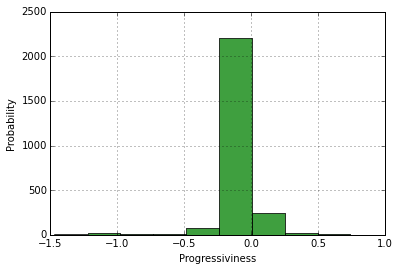

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(minus_progressivinesses, 10, facecolor='green', alpha=0.75)

plt.xlabel('Progressiviness')
plt.ylabel('Probability')
plt.grid(True)

plt.show()